<a href="https://colab.research.google.com/github/lcqsigi/big-data2/blob/main/Team5Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

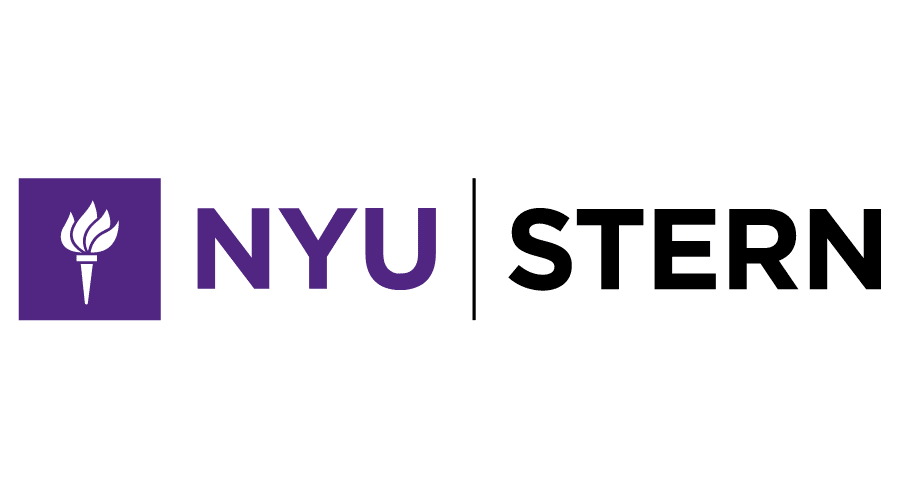

In [ ]:
from IPython.display import Image
from IPython.core.display import HTML 

display(Image('https://seekvectorlogo.com/wp-content/uploads/2019/06/nyu-stern-vector-logo.png',width=500, height=300))

#plan to add some html to format the report

# <font size = 10, color = "#551A8B"> <center>Dealing with Data</center> </font>
## <font size = 8> <center> Amazon Phone reviews by using Big Data Analytics Techniques</center></font>
### <center> TECH-GB-</center>

###    <center> </center>
###    <center> </center>
###    <center> </center>


# <center>Team 5 </center>
###    <center>Ke Shi</center>
###    <center>Kelley Henry</center>
###    <center>Nick Cevallos</center>
###    <center>Roel Sanchez-Carrera</center>



###    <center> </center>
###    <center> </center>
###    <center> </center>
###    <center> </center>




Kelley Henry

Roel Sanchez-Carrera

Ke Shi

Nick Cevallos


1 - Clean up/pre-processing

2 - by product/brand analysis

3 - sentiment analysis & plots 

### Data cleaning - removing special characters using Python in the bigdata.stern.nyu.edu (*to be completed by Roel, I will add the pre-processing work I did in the bigdata.stern.nyu.edu machine to remove emojis, greek letters, etc.*)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re
from nltk import SnowballStemmer
from nltk.corpus import stopwords

%matplotlib inline 

!wget https://github.com/lcqsigi/big-data2/archive/refs/heads/main.zip 

!cp big-data2-main/Amazon_Unlocked_Mobile.mod.tar.bz2 .

!unzip main.zip

!cp big-data2-main/Amazon_Unlocked_Mobile.mod.tar.bz2 .

!bunzip2 Amazon_Unlocked_Mobile.mod.tar.bz2 
!tar -xvf Amazon_Unlocked_Mobile.mod.tar

with open('Amazon_Unlocked_Mobile.mod.csv','r') as in_file, open('Amazon_Unlocked_Mobile.mod2.csv','w') as out_file:
    seen = set() # set for fast O(1) amortized lookup
    for line in in_file:
        if line not in seen: 
            seen.add(line)
            out_file.write(line)
print(len(seen))

In [ ]:
#from google.colab import drive
#drive.mount("/content/gdrive")

In [ ]:
#from google.colab import files
#uploaded = files.upload()

**How to generate a clean *.csv file that can be loaded into MySQL**

*   The original file "Amazon_Unlocked_Mobile.csv" that was downloaded from the Kaggle repository (https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones) contained 413849 rows, but a good number of these rows contained special characters (e.g., emojis, see picture below), which needed to be removed with a python script.
*   To remove the emojis or other special characters, we used the **bigdata.stern.nyu.edu** cluster because we checked row by row. 
*   To execute this task, we divided the original 413849 rows in 8 sets of 50,000 rows and 1 set of 13849 rows. Upon executing the python script shown below, it took approximately 30 minutes to clean each individual set of rows.
*   Once, we removed the special characters (e.g., emojis) we could upload the "Amazon_Unlocked_Mobile.mod.csv" into MySQL see notes in the next section.


### Upload data into MySQL
**Step 1: Using Pandas together with SQL**



In [ ]:
pip install -U sql_magic

In [ ]:
pip install mysqlclient

     |████████████████████████████████| 92kB 5.7MB/s 
  Created wheel for mysqlclient: filename=mysqlclient-2.0.3-cp37-cp37m-linux_x86_64.whl size=100102 sha256=6e25e3a1b64f86c892dad97354da7181cc692b609ac6067922a48c495891356d
  Stored in directory: /root/.cache/pip/wheels/75/ca/e8/ad4e7ce3df18bcd91c7d84dd28c7c08db491a2a2360efed363
Successfully built mysqlclient


In [ ]:
!sudo -H pip3 install -U sqlalchemy

     |████████████████████████████████| 1.5MB 17.3MB/s 
  Found existing installation: SQLAlchemy 1.4.7
    Uninstalling SQLAlchemy-1.4.7:
      Successfully uninstalled SQLAlchemy-1.4.7


**Step 2: Importing into DataFrames using read_sql**

The `read_sql` function of Pandas allows us to create a dataframe directly from a SQL query. To execute the query, we first setup the connection to the database using the SQLAlchemy library.

In [ ]:
from sqlalchemy import create_engine

**Step 3: Inserting Data in a Database using Pandas**

In [ ]:
# Connect to the MySQL, but without selecting a database
conn_string = 'mysql://{user}:{password}@{host}:{port}/'.format(
    user='DealingS21GB5', password='DealingS21GB5!!', 
    host = 'bigdata.stern.nyu.edu', port=3306,charset='utf8',encoding="cp437", errors='ignore')
engine = create_engine(conn_string)

In [ ]:
engine.execute("USE DealingS21GB5")

In [ ]:
#df = pd.read_sql("SELECT * FROM amazon LIMIT 413800", con=engine)

In [ ]:
#Printing length of VAR() characters after importing *.CSV file from the MySQL server
#list0=['Product_Name','Brand_Name','Reviews']
#for x in range(0,3,1):
#  var1=df[list0[x]].str.len().max()
#  print (var1)
#  var1=""

### Data Prepocessing

**Step 1: Amazon Reviews without "special characters"**

!wget https://github.com/lcqsigi/big-data2/archive/refs/heads/main.zip 

!unzip main.zip

!cp big-data2-main/Amazon_Unlocked_Mobile.mod.tar.bz2 .

!bunzip2 Amazon_Unlocked_Mobile.mod.tar.bz2

!tar -xvf Amazon_Unlocked_Mobile.mod.tar

In [ ]:
#Replaced uploading data from *CVS file, with data from MySQL
reviews2 = pd.read_sql("SELECT * FROM amazon LIMIT 413800", con=engine)
#reviews = pd.read_csv('/content/Amazon_Unlocked_Mobile.mod2.csv', encoding="utf-8", dtype="unicode")

In [ ]:
#reviews2=reviews.rename({'Product Name': 'Product_Name', 'Brand Name': 'Brand_Name', 'Review Votes': 'Review_Votes'}, axis=1)
reviews2.drop_duplicates(inplace=True)

**Step 2: Remove Blank Values**

In [ ]:
# replace blank values in all the cells with 'NaN'
reviews2.replace('',np.NaN)

,Product_Name,Brand_Name,Price,Rating,Reviews,Review_Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH D7...",Samsung,199.99,5.0,I feel so LUCKY to have found this used phone ...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH D7...",Samsung,199.99,4.0,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH D7...",Samsung,199.99,5.0,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH D7...",Samsung,199.99,4.0,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH D7...",Samsung,199.99,4.0,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
413781,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5.0,"Great phone. Large keys, best flip phone I hav...",0.0
413782,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5.0,"Pros.Works great, very durable, easy to naviga...",0.0
413783,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5.0,just as described perfect for the price,0.0
413784,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,1.0,Would not work,0.0


In [ ]:
# delete all the rows which contain at least one cell with NaN values
reviews2.dropna(axis=0, how='any') 

,Product_Name,Brand_Name,Price,Rating,Reviews,Review_Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH D7...",Samsung,199.99,5.0,I feel so LUCKY to have found this used phone ...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH D7...",Samsung,199.99,4.0,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH D7...",Samsung,199.99,5.0,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH D7...",Samsung,199.99,4.0,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH D7...",Samsung,199.99,4.0,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
413781,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5.0,"Great phone. Large keys, best flip phone I hav...",0.0
413782,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5.0,"Pros.Works great, very durable, easy to naviga...",0.0
413783,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5.0,just as described perfect for the price,0.0
413784,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,1.0,Would not work,0.0


**Step 3 : Following are few of the data cleasing processes we performed**

*   lower case (if needed)
*   remove non-alphanumeric such as digits and symbols
*   stemming word (if needed)

In [ ]:
import re
def clean(text, lower=True, remove_stop=False, stemming=False):
    ###text = re.sub("[^a-zA-Z]", ' ', str(text))
    text = re.sub("[^a-zA-Z^']", ' ', str(text))  ##Added by RS
    if lower:
        text = text.lower()
    words = text.split(" ")
    if remove_stop:
        stops = set(stopwords.words('english'))
        words = [w for w in words if not w in stops]
    if stemming:
        stemmer = SnowballStemmer('english')
        words = [stemmer.stem(w) for w in words]
    return " ".join(words)

# print(type(phones.head(1).Reviews))
# print(reviews2['Reviews'])
reviews2["Reviews"] = reviews2["Reviews"].apply(clean)

reviews2.replace(' ', np.nan, inplace=True)
reviews2.dropna(axis=0, how='any', inplace=True)
print(reviews2)
print(reviews2.head(5).Reviews) 

                                             Product_Name  ... Review_Votes
0       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH D7...  ...          1.0
1       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH D7...  ...          0.0
2       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH D7...  ...          0.0
3       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH D7...  ...          0.0
4       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH D7...  ...          0.0
...                                                   ...  ...          ...
413781  Samsung Convoy U640 Phone for Verizon Wireless...  ...          0.0
413782  Samsung Convoy U640 Phone for Verizon Wireless...  ...          0.0
413783  Samsung Convoy U640 Phone for Verizon Wireless...  ...          0.0
413784  Samsung Convoy U640 Phone for Verizon Wireless...  ...          0.0
413785  Samsung Convoy U640 Phone for Verizon Wireless...  ...          0.0

[348695 rows x 6 columns]
0    i feel so lucky to have found this used phone ...
1    n

In [ ]:
# Rename the final processed data into a new csv file, called 'labelled_dataset.csv'
reviews2.to_csv('labelled_dataset.csv', index=False)
labelled = pd.read_csv('labelled_dataset.csv')
print(labelled)

reviews2.head(5)

                                             Product_Name  ... Review_Votes
0       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH D7...  ...          1.0
1       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH D7...  ...          0.0
2       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH D7...  ...          0.0
3       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH D7...  ...          0.0
4       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH D7...  ...          0.0
...                                                   ...  ...          ...
348690  Samsung Convoy U640 Phone for Verizon Wireless...  ...          0.0
348691  Samsung Convoy U640 Phone for Verizon Wireless...  ...          0.0
348692  Samsung Convoy U640 Phone for Verizon Wireless...  ...          0.0
348693  Samsung Convoy U640 Phone for Verizon Wireless...  ...          0.0
348694  Samsung Convoy U640 Phone for Verizon Wireless...  ...          0.0

[348695 rows x 6 columns]


,Product_Name,Brand_Name,Price,Rating,Reviews,Review_Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH D7...",Samsung,199.99,5.0,i feel so lucky to have found this used phone ...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH D7...",Samsung,199.99,4.0,nice phone nice up grade from my pantach revu...,0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH D7...",Samsung,199.99,5.0,very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH D7...",Samsung,199.99,4.0,it works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH D7...",Samsung,199.99,4.0,great phone to replace my lost phone the only...,0.0


In [ ]:
files.download('labelled_dataset.csv')  # can download and check

In [ ]:
!ls -ltr

total 110924
drwxr-xr-x 1 root root      4096 Apr 21 13:39 sample_data
-rw-r--r-- 1 root root 113577749 May  7 14:05 labelled_dataset.csv


### Sentiment analysis

In [ ]:
import nltk
nltk.download('punkt') 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from nltk import tokenize
analyzer=SentimentIntensityAnalyzer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
#Testing out the loop to see if it isolates only the reviews - it does

for i in labelled["Reviews"]:
  reviewscolumn = i
  print(reviewscolumn)

Streaming output truncated to the last 5000 lines.
it does a great cellphone
ok
still used   was really good sale
great phone
exelente
excelente
bien bien
some people really like them but i'm not a fan of blackberry  this phone especially  the buttons feel cheap and i had to be on the phone for over an hour for at least two days while carrier and i tried to figure out how to get this thing to work  i finally gave it away after having it for only two weeks 
good phone recently in use yet  very very recomend for all world than require a smart phone for work 
i asked for a lavanda blackberry  and i receveid a purple one i receveid on tome  but in different color 
 nice and practical basic but not cheap   very resistant to daily accidents rain food etc 
telefono llego en buenas condiciones tal cual como se supone vendria recomiendo ampliamente al vendedor por ser una persona muy seria y cumplida
not much to say but i good phone came on time but it was just that i change my mind after getti

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
very good
well  it is a blackberry  the wife wanted to try it  eh  so so  doesn't compete with smartphones  but it's not supposed to 
muy bueno
lo mejor de lo mejor  el diseno esta espectacular y excelente  dios me lo bendiga  fue un placer hacer negocios  le doy    estrellas 
excellent  i received perfect
excelente
excellent
verg good nice
this pone is crap in my country because the phone it hasnt the      mhz band  unlockedcellphonekings are scammers watchout with this seller and the pone was used o my god   so shame of you 
phone came with in   days  phone looked great but when i went to sprin to have it turned on in my name they said it had a bad esn it was reported stolen lost 
well i thought i was purchasing a refurbished blackberry but when i got the package today i opened it to discover a brand new  never used  still in the sprint box sealed up tight phone  i activated it with sprint  no problem and have already made a couple o

KeyboardInterrupt: ignored

In [ ]:
# Gets the total score for all reviews in data

allreviewscores= analyzer.polarity_scores(reviewscolumn)
print(allreviewscores)

{'neg': 0.114, 'neu': 0.632, 'pos': 0.255, 'compound': 0.6659}


In [ ]:
# Gets sentiment score for each review in all of the data

for i in reviews2["Reviews"]:
  reviewscores =analyzer.polarity_scores(i)
  for k in sorted(reviewscores, reverse=True):
    print('{0}: {1}, '.format(k,reviewscores[k],end=' '))

Streaming output truncated to the last 5000 lines.
neu: 0.964, 
neg: 0.036, 
compound: -0.1027, 
pos: 0.0, 
neu: 0.805, 
neg: 0.195, 
compound: -0.6249, 
pos: 0.492, 
neu: 0.508, 
neg: 0.0, 
compound: 0.8658, 
pos: 0.244, 
neu: 0.756, 
neg: 0.0, 
compound: 0.4404, 
pos: 0.0, 
neu: 0.787, 
neg: 0.213, 
compound: -0.4019, 
pos: 0.508, 
neu: 0.492, 
neg: 0.0, 
compound: 0.7351, 
pos: 0.697, 
neu: 0.211, 
neg: 0.092, 
compound: 0.8625, 
pos: 0.762, 
neu: 0.238, 
neg: 0.0, 
compound: 0.4927, 
pos: 0.592, 
neu: 0.408, 
neg: 0.0, 
compound: 0.4404, 
pos: 0.451, 
neu: 0.549, 
neg: 0.0, 
compound: 0.6249, 
pos: 0.293, 
neu: 0.707, 
neg: 0.0, 
compound: 0.4404, 
pos: 0.347, 
neu: 0.653, 
neg: 0.0, 
compound: 0.4927, 
pos: 0.0, 
neu: 1.0, 
neg: 0.0, 
compound: 0.0, 
pos: 0.516, 
neu: 0.484, 
neg: 0.0, 
compound: 0.4927, 
pos: 0.476, 
neu: 0.524, 
neg: 0.0, 
compound: 0.8442, 
pos: 0.0, 
neu: 0.632, 
neg: 0.368, 
compound: -0.5423, 
pos: 0.197, 
neu: 0.803, 
neg: 0.0, 
compound: 0.8885, 
pos: 0.13

KeyboardInterrupt: ignored

In [ ]:
#isolates reviews from Samsung, Apple, and Blu devices each (three of the brands that are bought the most)

samsungreviews = reviews2[reviews2['Brand_Name']=='Samsung']
#print(samsungreviews)

applereviews = reviews2[reviews2['Brand_Name']=='Apple']
#print(applereviews)

blureviews = reviews2[reviews2['Brand_Name']=='BLU']
#print(blureviews)

In [ ]:
###Collect the average of the "negative results". Negative results from 
###the sentiment analysis and Review's ratings are correlated. The more negative 
###the value of the sentiment analysis, the lower the rating as collected by Amazon

count_samsung=0
sent_samsung=0
for i in samsungreviews["Reviews"]:
    count_samsung+=1
    scores_samsung=analyzer.polarity_scores(i)
    sent_samsung+=scores_samsung['neg']
    samsungreviewscolumn = i
#print(count_samsung)
#print(samsungreviewscolumn)
#allsamsungreviewscores= analyzer.polarity_scores(samsungreviewscolumn)
#print ('Samsung: ', allsamsungreviewscores)
print("\'neg\' tag average from the sentiment analysis for Samsung: ", sent_samsung/count_samsung)

count_apple=0
sent_apple=0
for i in applereviews["Reviews"]:
    count_apple+=1
    scores_apple=analyzer.polarity_scores(i)
    sent_apple+=scores_apple['neg']
    applereviewscolumn = i
#print(count_apple)
#print(applereviewscolumn)
#allapplereviewscores= analyzer.polarity_scores(applereviewscolumn)
#print ('Apple: ', allapplereviewscores)
print("\'neg\' tag average from the sentiment analysis for Apple: ", sent_apple/count_apple)

count_blu=0
sent_blu=0
for i in blureviews["Reviews"]:
    count_blu+=1
    scores_blu=analyzer.polarity_scores(i)
    sent_blu+=scores_blu['neg']
    blureviewscolumn = i
#print(count_blu)
#print(blureviewscolumn)
#allblureviewscores= analyzer.polarity_scores(blureviewscolumn)
#print ('BLU: ', allblureviewscores)
print("\'neg\' tag average from the sentiment analysis for BLU: ", sent_blu/count_blu)

'neg' tag average from the sentiment analysis for Samsung:  0.0509794669443377
'neg' tag average from the sentiment analysis for Apple:  0.0570054929633928
'neg' tag average from the sentiment analysis for BLU:  0.05917250392054364


In [ ]:
# Gets the total score for all Samsung, Blu, Apple reviews in data

for i in samsungreviews["Reviews"]:
  samsungreviewscolumn = i
#  print(samsungreviewscolumn)

allsamsungreviewscores= analyzer.polarity_scores(samsungreviewscolumn)
print ('Samsung: ', allsamsungreviewscores)

for i in applereviews["Reviews"]:
  applereviewscolumn = i
#  print(applereviewscolumn)

allapplereviewscores= analyzer.polarity_scores(applereviewscolumn)
print ('Apple: ', allapplereviewscores)

for i in blureviews["Reviews"]:
  blureviewscolumn = i
#  print(blureviewscolumn)

allblureviewscores= analyzer.polarity_scores(blureviewscolumn)
print ('BLU: ', allblureviewscores)

Streaming output truncated to the last 5000 lines.
good
great product
i'm happy to have it 
excellent
this phone is a beast best phone ever 
note   looks very excellent  but i have not used it because of my sim size not to match it and i shall replace smi card after i return china next week thanks
so far it's functioning very well very pleased with it 
there was no manual no charger for this price made in vietnam intended for the arab market and until i understood that you can no longer changethe batteries my most stupid buy ever 
the phone is nice but it doesn't connect to anything i have via bluetooth  it won't mirror screen to my projector and the touch sensitivity is slow 
no samsung pay 
it keeps saying video chat is not available on this device and the microsoft documents are saying they are incompatible to my g phone   why are these problem happening and is there a way around them or to fix them please help
i like it 
love iy
use this it work great
great product  great value 
th

In [ ]:
#Gets sentiment analysis of each review from just Samsung devices

for i in samsungreviews:
  samsungreviewscores =analyzer.polarity_scores(i)
  for k in sorted(samsungreviewscores, reverse=True):
    print('{0}: {1}, '.format(k,samsungreviewscores[k],end=' '))


pos: 0.0, 
neu: 1.0, 
neg: 0.0, 
compound: 0.0, 
pos: 0.0, 
neu: 1.0, 
neg: 0.0, 
compound: 0.0, 
pos: 0.0, 
neu: 1.0, 
neg: 0.0, 
compound: 0.0, 
pos: 0.0, 
neu: 1.0, 
neg: 0.0, 
compound: 0.0, 
pos: 0.0, 
neu: 1.0, 
neg: 0.0, 
compound: 0.0, 
pos: 0.0, 
neu: 1.0, 
neg: 0.0, 
compound: 0.0, 


In [ ]:
# Gets the average rating for all Samsung, Blu, Apple reviews in data and compares it to the sentiment analysis

samsungreviewsint = samsungreviews['Rating'].astype(int)
samsungmeanrating = samsungreviewsint.mean()
print('Samsung average phone rating is: ', samsungmeanrating, 'compared to Samsung phone sentiment: ', allsamsungreviewscores)

applereviewsint = applereviews['Rating'].astype(int)
applemeanrating = applereviewsint.mean()
print('Apple average phone rating is: ', applemeanrating, 'compared to Apple phone sentiment: ', allapplereviewscores)

#blureviewsint = blureviews['Rating'].astype(int)
#blumeanrating = blureviewsint.mean()
#print('Blu average phone rating is: ', nokiameanrating, 'compared to Blu phone sentiment: ', allblureviewscores)

blureviewsint = blureviews['Rating'].astype(int)
blumeanrating = blureviewsint.mean()
print('Blu average phone rating is: ', blumeanrating, 'compared to Blu phone sentiment: ', allblureviewscores)

Samsung average phone rating is:  3.9113461573592008 compared to Samsung phone sentiment:  {'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'compound': 0.5927}
Apple average phone rating is:  3.8945711880036886 compared to Apple phone sentiment:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Blu average phone rating is:  3.7377011093686474 compared to Blu phone sentiment:  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4215}


By Brand Analysis 
1. Sales Volume - including bar chart of top 10
2. Total Sales $
3. Average Price
4. Average Rating

Top 10 count of the most popular brands that have amazon reviews. The chart clearly shows that Samsung, BLU & Apple are by far the most common. The three brands have over 165,000 reviews combined.

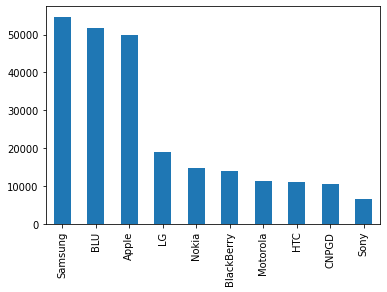

In [ ]:
labelled["Brand_Name"] = pd.Categorical(labelled["Brand_Name"],ordered=False) #allows group by brand



brand_counts = labelled["Brand_Name"].value_counts() #count of Brand Names
brand_counts
brand_counts[:10].plot(kind="bar")

What are the total sales dollars for the three top brands previously identified. Surprisingly, the total sales dolalrs does not exactly match the order of the top brands by sales volume.

Total Sales:
* Samsung $18.4M

* Apple $17.1M

* BLU $14.7M

In [ ]:

pivot = pd.pivot_table(
    data = labelled,
    index = "Brand_Name",
    values = 'Price',
    aggfunc = 'sum'
)
pivot.query('Brand_Name ==["Samsung","Apple","BLU"]')

,Price
Brand_Name,
Apple,1.509171e+07
BLU,1.304615e+07
Samsung,1.561473e+07


What is the average price per brand, this explains why Apple has a higher total sales dollars but lower sales voluem compared to BLU.

Average Unit Price:

* Apple $305

* Samsung $293

* BLU $248

In [ ]:

pivot = pd.pivot_table(
    data = labelled,
    index = 'Brand_Name',
    values = 'Price',
    aggfunc = 'mean'
)
pivot.query('Brand_Name ==["Samsung","Apple","BLU"]')

,Price
Brand_Name,
Apple,302.548215
BLU,252.582717
Samsung,285.247398


The below shows the average rating per brand. When combined with the previous average price analysis; the data points to the old addage "you pay for what you get." Because Apple & Samsung have considerably higher average ratings (>10 basis points); they are able to charge a significant premium (>$44) compared to BLU.

Average Rating:
* Samsung 3.97

* Apple 3.92

* BLU 3.82

In [ ]:

pivot = pd.pivot_table(
    data = labelled,
    index = 'Brand_Name',
    values = 'Rating',
    aggfunc = 'mean'
)
pivot.query('Brand_Name ==["Samsung","Apple","BLU"]')



,Rating
Brand_Name,
Apple,3.894571
BLU,3.737701
Samsung,3.911346


By Product Analysis
1. Sales Volume - including bar chart of top 10
2. Total Sales $
3. Average Price
4. Average Rating

The below illustrates the top 10 phones. For the subsequent analysis, we will focus on the top 2 phones for each of the three previously discussed brands (Samsung, Apple & BLU).

Samsung

* Samsung Galaxy S Duos II S7582 DUAL SIM Factory Unlocked International Version Black

* Samsung Galaxy S Duos GT S7562 GSM Unlocked Touchscreen 5MP Camera Smartphone White

Apple

* Apple iPhone 5s 32GB Silver AT T

* Apple iPhone 4S 16GB Unlocked GSM White Certified Refurbished

BLU

* BLU Studio 5.0 C HD Unlocked Cellphone, Black

* BLU Energy X Plus Smartphone With 4000 mAh Super Battery US GSM Unlocked Grey

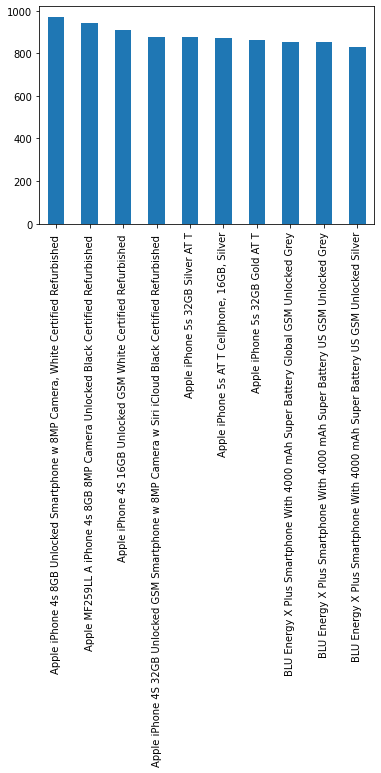

In [ ]:
labelled["Product_Name"] = pd.Categorical(labelled["Product_Name"],ordered=False) #allows group by product



product_counts = labelled["Product_Name"].value_counts() #count of Product Names
product_counts 
product_counts[:10].plot(kind="bar")


Below shows the total sales by product. It is worth pointing out that the iPhone 5s has significally lower sales considering it was the #6 overall most popular phone.

* Samsung Galaxy S Duos II S7582 $325k

* Samsung Galaxy S Duos GT S7562 $102k

* Apple iPhone 5s 32GB Silver $47k

* Apple iPhone 4S 16GB Unlocked $136k

* BLU Studio 5.0 C HD Unlocked $195k

* BLU Energy X Plus $148k

In [ ]:

pivot = pd.pivot_table(
    data = labelled,
    index = ["Brand_Name","Product_Name"],
    values = 'Price',
    aggfunc = 'sum'
)
pivot.query('Product_Name ==["Samsung Galaxy S Duos II S7582 DUAL SIM Factory Unlocked International Version Black","Samsung Galaxy S Duos GT S7562 GSM Unlocked Touchscreen 5MP Camera Smartphone White","Apple iPhone 5s 32GB Silver AT T","Apple iPhone 4S 16GB Unlocked GSM White Certified Refurbished ","BLU Studio 5.0 C HD Unlocked Cellphone, Black","BLU Energy X Plus Smartphone With 4000 mAh Super Battery US GSM Unlocked Grey"]')

Price
Brand_Name Product_Name                                                 
Apple      Apple iPhone 4S 16GB Unlocked GSM White Certifi...  118160.91
           Apple iPhone 5s 32GB Silver AT T                     38456.25
BLU        BLU Energy X Plus Smartphone With 4000 mAh Supe...  118289.00
           BLU Studio 5.0 C HD Unlocked Cellphone, Black       143088.00
Samsung    Samsung Galaxy S Duos GT S7562 GSM Unlocked Tou...   73156.44
           Samsung Galaxy S Duos II S7582 DUAL SIM Factory...  230992.30

The below illustrates the average price per phone. There is a considerable range of prices, from $44 - $300. 

* Samsung Galaxy S Duos II S7582: $300

* Samsung Galaxy S Duos GT S7562: $96

* Apple iPhone 5s 32GB Silver: $44

* Apple iPhone 4S 16GB Unlocked: $130

* BLU Studio 5.0 C HD Unlocked: $173

* BLU Energy X Plus: $139

In [ ]:

pivot = pd.pivot_table(
    data = labelled,
    index = ["Brand_Name","Product_Name"],
    values = 'Price',
    aggfunc = 'mean'
)
pivot.query('Product_Name ==["Samsung Galaxy S Duos II S7582 DUAL SIM Factory Unlocked International Version Black","Samsung Galaxy S Duos GT S7562 GSM Unlocked Touchscreen 5MP Camera Smartphone White","Apple iPhone 5s 32GB Silver AT T","Apple iPhone 4S 16GB Unlocked GSM White Certified Refurbished ","BLU Studio 5.0 C HD Unlocked Cellphone, Black","BLU Energy X Plus Smartphone With 4000 mAh Super Battery US GSM Unlocked Grey"]')

Price
Brand_Name Product_Name                                              
Apple      Apple iPhone 4S 16GB Unlocked GSM White Certifi...  129.99
           Apple iPhone 5s 32GB Silver AT T                     43.95
BLU        BLU Energy X Plus Smartphone With 4000 mAh Supe...  139.00
           BLU Studio 5.0 C HD Unlocked Cellphone, Black       173.44
Samsung    Samsung Galaxy S Duos GT S7562 GSM Unlocked Tou...   95.88
           Samsung Galaxy S Duos II S7582 DUAL SIM Factory...  299.99

The below illustrates the average rating per phone. Again, there is a considerable range of 3.38 - 4.33. The two highest rated phones coincidently are the most expensive. Ironically, the iPhone 5s is the cheapest phone but has the third highest rating.

* Samsung Galaxy S Duos II S7582: 4.33

* Samsung Galaxy S Duos GT S7562: 3.61

* Apple iPhone 5s 32GB Silver: 4.00

* Apple iPhone 4S 16GB Unlocked: 3.39

* BLU Studio 5.0 C HD Unlocked: 4.24

* BLU Energy X Plus: 3.80

In [ ]:

pivot = pd.pivot_table(
    data = labelled,
    index = ["Brand_Name","Product_Name"],
    values = 'Rating',
    aggfunc = 'mean'
)
pivot.query('Product_Name ==["Samsung Galaxy S Duos II S7582 DUAL SIM Factory Unlocked International Version Black","Samsung Galaxy S Duos GT S7562 GSM Unlocked Touchscreen 5MP Camera Smartphone White","Apple iPhone 5s 32GB Silver AT T","Apple iPhone 4S 16GB Unlocked GSM White Certified Refurbished ","BLU Studio 5.0 C HD Unlocked Cellphone, Black","BLU Energy X Plus Smartphone With 4000 mAh Super Battery US GSM Unlocked Grey"]')

Rating
Brand_Name Product_Name                                                
Apple      Apple iPhone 4S 16GB Unlocked GSM White Certifi...  3.323432
           Apple iPhone 5s 32GB Silver AT T                    3.924571
BLU        BLU Energy X Plus Smartphone With 4000 mAh Supe...  3.793184
           BLU Studio 5.0 C HD Unlocked Cellphone, Black       4.132121
Samsung    Samsung Galaxy S Duos GT S7562 GSM Unlocked Tou...  3.368283
           Samsung Galaxy S Duos II S7582 DUAL SIM Factory...  4.171429